# FalconX Quantitative Analyst Intern - Assignment
## SUHAS JAIN
## suhasjain142@gmail.com

In [ ]:
#Importing needed libraries
import requests
import json
import pandas as pd

In [144]:
#The query which needs to be sent to Uniswap API v2 to get the data 
#At a time at max data of only 1000 trades is permitted

query = """query trades{
  swaps(where:{pair: "0xd3d2e2692501a5c9ca623199d38826e513033a17"}, orderBy: timestamp, orderDirection: desc, first:1000) {
    id
    timestamp
    amount0In
    amount1In
    amount0Out
    amount1Out
    pair {
      token0 {
        id
        symbol
      }
      token1 {
        id
        symbol
      }
      volumeUSD
    }
    transaction {
      blockNumber
    }
    amountUSD
  }
}"""

In [145]:
#Querying the data 
url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'
r = requests.post(url, json={'query': query})
print(r.status_code)
print(r.text)

200
{"data":{"swaps":[{"amount0In":"7.23198210190853523","amount0Out":"0","amount1In":"0","amount1Out":"0.064873342956701223","amountUSD":"129.2242784632544022313321179004206","id":"0x6d7f9f8e02be28d7d9b005a57bf89ad2bf52f79b9767166d3722644495609967-0","pair":{"token0":{"id":"0x1f9840a85d5af5bf1d1762f925bdaddc4201f984","symbol":"UNI"},"token1":{"id":"0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2","symbol":"WETH"},"volumeUSD":"6639410165.383822037552912872412716"},"timestamp":"1624550544","transaction":{"blockNumber":"12697787"}},{"amount0In":"1000","amount0Out":"0","amount1In":"0","amount1Out":"8.974299764792112921","amountUSD":"17874.55733562541740846665092808075","id":"0xaec83557891ebeade4b33ee34df449533ef0020a4c84503f83eb90ab1ac8c0de-0","pair":{"token0":{"id":"0x1f9840a85d5af5bf1d1762f925bdaddc4201f984","symbol":"UNI"},"token1":{"id":"0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2","symbol":"WETH"},"volumeUSD":"6639410165.383822037552912872412716"},"timestamp":"1624550240","transaction":{"b

In [146]:
#Converting the data to JSON and then JSON to pandas dataframe
json_data = json.loads(r.text)
df_data = json_data['data']['swaps']
df = pd.DataFrame(df_data)
df.head(10)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,id,pair,timestamp,transaction
0,7.23198210190853523,0,0,0.064873342956701223,129.2242784632544022313321179004206,0x6d7f9f8e02be28d7d9b005a57bf89ad2bf52f79b9767...,{'token0': {'id': '0x1f9840a85d5af5bf1d1762f92...,1624550544,{'blockNumber': '12697787'}
1,1000,0,0,8.974299764792112921,17874.55733562541740846665092808075,0xaec83557891ebeade4b33ee34df449533ef0020a4c84...,{'token0': {'id': '0x1f9840a85d5af5bf1d1762f92...,1624550240,{'blockNumber': '12697767'}
2,805.387345564042639185,0,0,7.233498002224145657,14409.40696674587233034099475024514,0xde9047496742c6e7c56a6a3294473bbb401b51d88d00...,{'token0': {'id': '0x1f9840a85d5af5bf1d1762f92...,1624550202,{'blockNumber': '12697765'}
3,6.689101836759231072,0,0,0.060098756134060713,120.3684166587344401699609027331976,0x02b34f618a6a5dbb364ab4a6e8c20f1b012b679ab65e...,{'token0': {'id': '0x1f9840a85d5af5bf1d1762f92...,1624549816,{'blockNumber': '12697736'}
4,7,0,0,0.062892421724329867,125.9994230786382751794895691692661,0x4f18fbb7b224891a81106c5542d0b7f3a3cdbcf8de41...,{'token0': {'id': '0x1f9840a85d5af5bf1d1762f92...,1624549779,{'blockNumber': '12697732'}
5,7.340972303288989367,0,0,0.065956346302748234,132.8851428572852762519052066943877,0x69e9eb95058dd0dc0a21b367e13ec44ee5b6b9d52dbc...,{'token0': {'id': '0x1f9840a85d5af5bf1d1762f92...,1624549607,{'blockNumber': '12697721'}
6,18.927858097431907052,0,0,0.170062857553428275,342.4978599937753274044154100751733,0xb5183052f02dca73f5ce29269922a66fd445b68dc249...,{'token0': {'id': '0x1f9840a85d5af5bf1d1762f92...,1624549382,{'blockNumber': '12697703'}
7,22.789222608814348745,0,0,0.204760151733268942,412.3083289706600056346758047017372,0x3700ab2876989298117c857f4c56656513932c78a0e4...,{'token0': {'id': '0x1f9840a85d5af5bf1d1762f92...,1624549189,{'blockNumber': '12697690'}
8,10,0,0,0.089850844090211017,180.9239044738040602660671996722696,0x6ea58a59127d9115bf7dc730ca6b6d9347df8e9a8a81...,{'token0': {'id': '0x1f9840a85d5af5bf1d1762f92...,1624549176,{'blockNumber': '12697689'}
9,0,300.41437392021735634,2.715170397969455043,0,5467.107507400404814563544087232316,0x12b2ba03599c28de45c24178261a25b6dda84d42740b...,{'token0': {'id': '0x1f9840a85d5af5bf1d1762f92...,1624549171,{'blockNumber': '12697688'}


In [147]:
#Adding the required columns to the dataframe 
df['Side'] = 'Buy'
df['Base Currency Quantity Traded'] = 0
df['Quote Currency Quantity Traded'] = 0

#Converting type of columns to float for easy operations 
df['amount0In'] = df['amount0In'].astype(float)
df['amount0Out'] = df['amount0Out'].astype(float)
df['amount1In'] = df['amount1In'].astype(float)
df['amount1Out'] = df['amount1Out'].astype(float)
df['amountUSD'] = df['amountUSD'].astype(float)

for index in df.index:
    #If the influx of base currency is 0 that signifies we are selling it
    if(df.loc[index,'amount0In'] == 0):
        df.loc[index,'Side'] = 'Sell'
    #Extracting USD volume data from pair data
    df.loc[index,'pair'] = df.loc[index,'pair']['volumeUSD']
    #Extracting block number (pool number) from transaction details
    df.loc[index,'transaction'] = df.loc[index,'transaction']['blockNumber']
    df.loc[index, 'Base Currency Quantity Traded'] = df.loc[index,'amount0In'] + df.loc[index,'amount0Out']
    df.loc[index, 'Quote Currency Quantity Traded'] = df.loc[index,'amount1In'] + df.loc[index,'amount1Out']

df['pair'] = df['pair'].astype(float)
#Removing, renaming and reordering the columns of the dataframe
df.drop(columns = ['amount0In', 'amount0Out', 'amount1In', 'amount1Out', 'id'], inplace = True)
df.columns = ['Amount in USD', 'Volume in USD', 'Timestamp', 'Pool ID', 'Side', 'Base Currency Quantity Traded', 'Quote Currency Quantity Traded']
df = df[['Timestamp', 'Side', 'Base Currency Quantity Traded', 'Quote Currency Quantity Traded', 'Amount in USD', 'Volume in USD', 'Pool ID']]
df = df.round(4)

In [148]:
#Viewing first 10 values
df.head(10)

,Timestamp,Side,Base Currency Quantity Traded,Quote Currency Quantity Traded,Amount in USD,Volume in USD,Pool ID
0,1624550544,Buy,7.2320,0.0649,129.2243,6.639410e+09,12697787
1,1624550240,Buy,1000.0000,8.9743,17874.5573,6.639410e+09,12697767
2,1624550202,Buy,805.3873,7.2335,14409.4070,6.639410e+09,12697765
3,1624549816,Buy,6.6891,0.0601,120.3684,6.639410e+09,12697736
4,1624549779,Buy,7.0000,0.0629,125.9994,6.639410e+09,12697732
5,1624549607,Buy,7.3410,0.0660,132.8851,6.639410e+09,12697721
6,1624549382,Buy,18.9279,0.1701,342.4979,6.639410e+09,12697703
7,1624549189,Buy,22.7892,0.2048,412.3083,6.639410e+09,12697690
8,1624549176,Buy,10.0000,0.0899,180.9239,6.639410e+09,12697689
9,1624549171,Sell,300.4144,2.7152,5467.1075,6.639410e+09,12697688


In [149]:
#Statistical description of the numerical columns 
df.describe()

,Base Currency Quantity Traded,Quote Currency Quantity Traded,Amount in USD,Volume in USD
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,609.280763,5.263941,9955.869901,6.639410e+09
std,1244.576543,10.547166,19565.507663,9.541515e-06
min,0.000000,0.000000,0.000000,6.639410e+09
25%,10.615800,0.093650,182.014875,6.639410e+09
50%,143.886150,1.259450,2384.292100,6.639410e+09
75%,669.843425,5.957250,11673.691350,6.639410e+09
max,13434.393000,108.281800,193642.507100,6.639410e+09


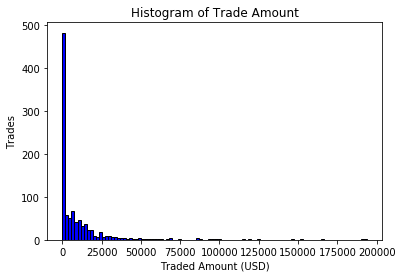

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(df['Amount in USD'], color = 'blue', edgecolor = 'black', bins = 100)

plt.title('Histogram of Trade Amount')
plt.xlabel('Traded Amount (USD)')
plt.ylabel('Trades')
plt.show()

We can notice that most of the trades take place in small amounts<br />
Let us look at the starting portion of the histogram in better detail

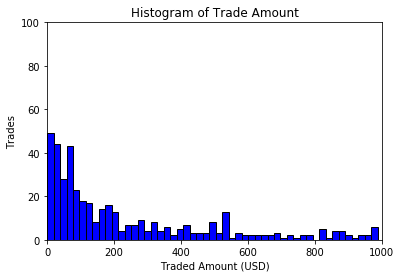

In [160]:
#Distribution of trade amounts less than $1000 
plt.hist(df['Amount in USD'], color = 'blue', edgecolor = 'black', bins = 10000)
plt.axis([0, 1000, 0, 100]) 
plt.title('Histogram of Trade Amount')
plt.xlabel('Traded Amount (USD)')
plt.ylabel('Trades')
plt.show()

Majority of trades take place with transactions less than $200

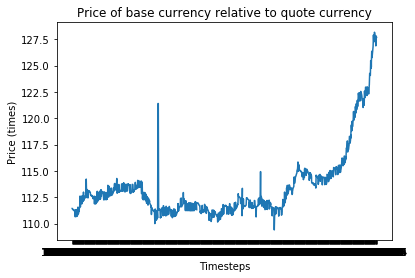

In [175]:
#Plotting price of WETH compared to UNI
plt.plot(df['Timestamp'], df['Base Currency Quantity Traded']/df['Quote Currency Quantity Traded'])
plt.title('Price of base currency relative to quote currency')
plt.xlabel('Timesteps')
plt.ylabel('Price (times)')
plt.show()

As we can see the price of base currency (WETH) wrt quoted currency (UNI) has increased gradually over the period

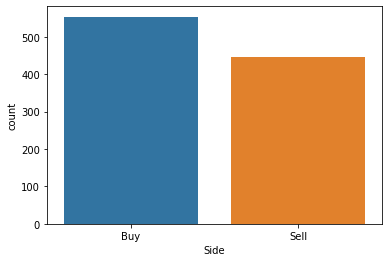

In [176]:
#Count of buy and sell trades 
sns.countplot(x ='Side', data = df)

In the given period there have been more buy trades compared to sell trades

In [187]:
#Counting the number of buy and sell side orders for 10 intevals of 100 timesteps each
count = 0
buys = []
sells = []
buy = 0
sell = 0
for index in df.index:
    if(df.loc[index, 'Side'] == 'Buy'):
        buy += 1
    else:
        sell += 1
    count += 1
    if(count == 100):
        count = 0
        buys.append(buy)
        sells.append(sell)
        buy = 0
        sell = 0

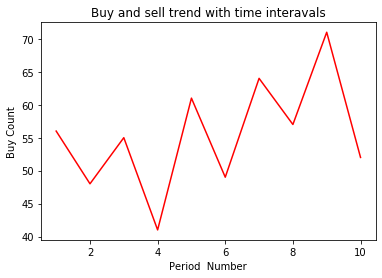

In [189]:
import numpy as np
x = np.arange(1, 11)
plt.title("Buy and sell trend with time interavals")
plt.xlabel("Period  Number")
plt.ylabel("Buy Count")
plt.plot(x, buys, color ="red")
plt.show()

Here we can notice a very interesting trend, after an interval of increased buying, selling increases and vice versa. This demonstrates sell-offs at a micro level.

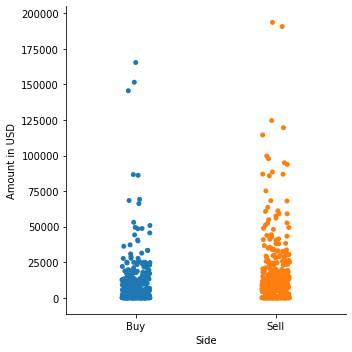

In [190]:
#Plot of buy and sell side orders with order size
sns.catplot(x="Side", y="Amount in USD", data=df)

Here we can notice that even though buy side orders are more in number, the quantity of large orders is much more in sell side orders when compared to buy side orders